![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/02_Decision%20Tree.%20A%20Supervised%20Classification%20Model/02_decision-tree_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 02 | Decision Tree. A Supervised Classification Model

# Load the Data

Load the dataset from [CIS](https://www.cis.es/cis/opencms/ES/index.html) executing the lines of code below:
> - The goal of this dataset is
> - To predict `internet_usage` of **people** (rows)
> - Based on their **socio-demographical characteristics** (columns)

In [1]:
import pandas as pd #!

df_internet = pd.read_excel('../data/internet_usage_spain.xlsx', sheet_name=1)
df_internet

,name,internet_usage,sex,age,education
0,Josefina,0,Female,66,Elementary
1,Vicki,1,Male,72,Elementary
2,David,1,Male,48,University
3,Curtis,0,Male,59,PhD
4,Josephine,1,Female,44,PhD
...,...,...,...,...,...
2450,Frances,1,Male,43,Elementary
2451,Harry,1,Female,18,High School
2452,Adam,0,Female,54,Elementary
2453,Christine,1,Male,31,High School


# Data Preprocessing

1. The Python function to fit the model cannot process information as a string. Therefore, you need to convert **categorical variables to dummy variables**.
2. You need to check for **missing data** and drop it in case there are.

In [2]:
# Names are not significant to predict the internet_usage of people meanwhile all other features are important to predict the target
# Therefore we will drop the name column from the dataset.
df_internet = df_internet.drop(columns='name')
df_internet

,internet_usage,sex,age,education
0,0,Female,66,Elementary
1,1,Male,72,Elementary
2,1,Male,48,University
3,0,Male,59,PhD
4,1,Female,44,PhD
...,...,...,...,...
2450,1,Male,43,Elementary
2451,1,Female,18,High School
2452,0,Female,54,Elementary
2453,1,Male,31,High School


In [3]:
# Convert the string type categorical data into dummy variables using pd.get_dummies

df_internet = pd.get_dummies(data=df_internet, drop_first=True)
df_internet

,internet_usage,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
0,0,66,0,0,0,0,0,0
1,1,72,1,0,0,0,0,0
2,1,48,1,0,0,0,0,1
3,0,59,1,0,0,0,1,0
4,1,44,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
2450,1,43,1,0,0,0,0,0
2451,1,18,0,1,0,0,0,0
2452,0,54,0,0,0,0,0,0
2453,1,31,1,1,0,0,0,0


In [4]:
# Check for the missing data or NaN/null values in the data and drop them if any
df_internet.isna().sum()

internet_usage            0
age                       0
sex_Male                  0
education_High School     0
education_Higher Level    0
education_No studies      0
education_PhD             0
education_University      0
dtype: int64

There are no missing or Nan/values present in the data

The data is preprocessed. Now we can create the model.

## `DecisionTreeClassifier()` Model in Python

### Fit the Model

In [5]:
# Seperate the variables 
explanatory = df_internet.drop(columns='internet_usage')
target = df_internet.internet_usage

In [6]:
# from sklearn library's tree module import DecisionTreeClassifier class
# Instantiate the model, Access the functions(fit, predict, score)
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X = explanatory, y= target)

DecisionTreeClassifier()

### Calculate Predictions

In [7]:
model_dt.predict_proba(X=explanatory)

array([[1.        , 0.        ],
       [0.8       , 0.2       ],
       [0.        , 1.        ],
       ...,
       [0.73333333, 0.26666667],
       [0.        , 1.        ],
       [0.84615385, 0.15384615]])

### Create a New DataFrame for the Predictions

In [8]:
# Creating a new DataFrame (df_pred) and putting a copy of the internet_usage column from df_internet 
df_pred = df_internet[['internet_usage']].copy()
df_pred

,internet_usage
0,0
1,1
2,1
3,0
4,1
...,...
2450,1
2451,1
2452,0
2453,1


In [9]:
# Creating a new column for the predicted probability by the model (pred_proba_dt) 
# Selecting all the rows (:) from the second column (1) because they represent the probabilities that the person uses internet.
# choosing [:, 1] who uses internet probability
df_pred['pred_probab_dt'] = model_dt.predict_proba(X=explanatory)[: , 1]
df_pred

,internet_usage,pred_probab_dt
0,0,0.000000
1,1,0.200000
2,1,1.000000
3,0,0.500000
4,1,1.000000
...,...,...
2450,1,0.500000
2451,1,1.000000
2452,0,0.266667
2453,1,1.000000


In [10]:
# calculate that if the probability is higher than 0.5, put it as 1. Otherwise, 0.

import numpy as np
 
df_pred['pred_dt'] = np.where(df_pred.pred_probab_dt > 0.5, 1, 0)
df_pred

,internet_usage,pred_probab_dt,pred_dt
0,0,0.000000,0
1,1,0.200000,0
2,1,1.000000,1
3,0,0.500000,0
4,1,1.000000,1
...,...,...,...
2450,1,0.500000,0
2451,1,1.000000,1
2452,0,0.266667,0
2453,1,1.000000,1


### Visualize the Model

In [11]:
from sklearn.tree import plot_tree

In [12]:
model_dt = DecisionTreeClassifier(max_depth=2)
model_dt.fit(X = explanatory, y= target)


DecisionTreeClassifier(max_depth=2)

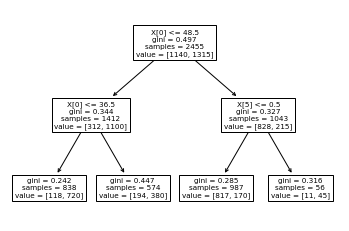

In [13]:
plot_tree(decision_tree=model_dt);

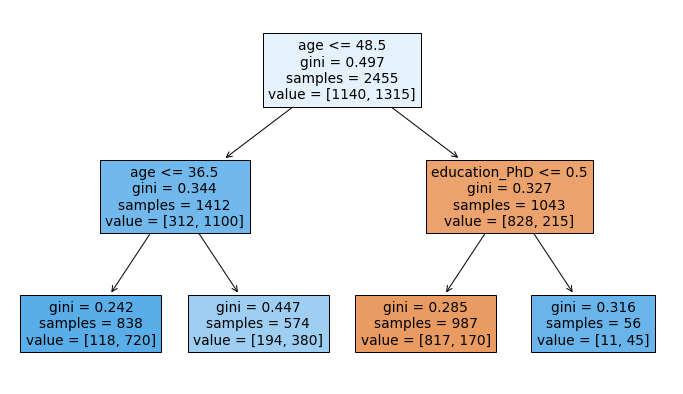

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
plot_tree(decision_tree=model_dt, feature_names= explanatory.columns , filled= True);

### Model Interpretation

Index 5 is a 34 year old Female who has completed her PhD and she uses internet

In [15]:
df_internet[5:6]

,internet_usage,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
5,1,34,0,0,0,0,1,0


In [16]:
explanatory[5:6]

,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
5,34,0,0,0,0,1,0


In [17]:
model_dt.predict_proba(X=explanatory[5:6])

array([[0.14081146, 0.85918854]])

In [18]:
# Predicted probability(0.85918854 )given by model is same as 
# Top to bottom:
# *root node*  Index 5 has age<=48.5 -> True -> Move left 
# *internal node/branch* Index 5 has age<=36.5  -> True -> Move left
# *leaf node* reached the bottom  
# 720 people out of 838 people uses internet so the probability that the person at index 5 uses internet becomes the fraction 
720/838

0.8591885441527446

In [19]:
model_dt.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': 2,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['age', 'sex_Male', 'education_High School',
        'education_Higher Level', 'education_No studies', 'education_PhD',
        'education_University'], dtype=object),
 'n_features_in_': 7,
 'n_outputs_': 1,
 'classes_': array([0, 1], dtype=int64),
 'n_classes_': 2,
 'max_features_': 7,
 'tree_': <sklearn.tree._tree.Tree at 0x1da30917ad0>}

### Model's Score

In [20]:
#Score represents the mean accuracy of the model
model_dt.score(X = explanatory, y= target)

0.7991853360488799

## Confusion Matrix

In [21]:
#Import Confusion_matrix and ConfusionMatrixDisplay from metrics module inside sklearn library
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

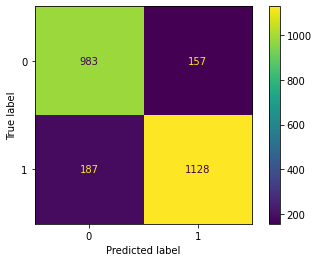

In [22]:
#Access the funtion, create an instance, then plot.
cm = confusion_matrix(y_true=df_internet.internet_usage , y_pred=df_pred.pred_dt)
CM = ConfusionMatrixDisplay(cm)
CM.plot();

### Classification Report

In [23]:
#Import classification_report from metrics module inside sklearn library, Instantiate and create a pandas dataframe to create the report
from sklearn.metrics import classification_report
report= classification_report(y_true = df_internet.internet_usage, y_pred = df_pred.pred_dt ,output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.840171,0.877821,0.859878,0.858996,0.860338
recall,0.862281,0.857795,0.859878,0.860038,0.859878
f1-score,0.851082,0.867692,0.859878,0.859387,0.859979
support,1140.000000,1315.000000,0.859878,2455.000000,2455.000000


### Sensitivity (Recall=1)

In [24]:
#Sensitivity tells us what percentage of people who uses internet internet were correctly identified 
#Sensitivity = True positives/ true positives + false negatives
sensitivity = cm[1,1]/cm[1, :].sum()
sensitivity

0.8577946768060837

### Specificity (Recall=0)

In [25]:
# Specificity tells us what percentage of people who do not use internet internet were correctly identified 
# Specificity = True negatives / False positivity + True negatives
specificity = cm[0,0]/cm[0,:].sum()
specificity

0.862280701754386

### ROC Curve

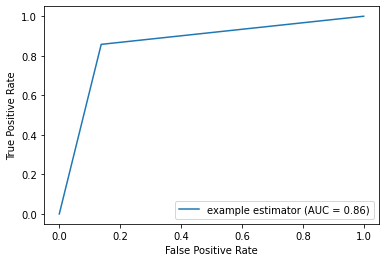

In [26]:
#Receiver operating characteristic (ROC) graphs are used for selecting the most appropriate classification models based on their performance
#ROC curve plots the graph between the false positive rate (FPR) and true positive rate (TPR)
from sklearn import metrics
y = df_pred.internet_usage
pred = df_pred.pred_dt
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

## `GradientBoostingClassifier()` in Python

### Fit the Model

In [27]:
# from sklearn library, ensemble module import GradientBoostingClassifier class 
# Instantiate the model , then access the functions fit, predict, score.
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier()
model_gb.fit(X = explanatory, y= target)


GradientBoostingClassifier()

### Calculate Predictions

In [28]:
df_pred['pred_proba_gb'] = model_gb.predict_proba(X = explanatory)[:,1]
df_pred

,internet_usage,pred_probab_dt,pred_dt,pred_proba_gb
0,0,0.000000,0,0.062835
1,1,0.200000,0,0.042295
2,1,1.000000,1,0.948696
3,0,0.500000,0,0.734479
4,1,1.000000,1,0.959207
...,...,...,...,...
2450,1,0.500000,0,0.510733
2451,1,1.000000,1,0.961344
2452,0,0.266667,0,0.171716
2453,1,1.000000,1,0.919814


### Model's Score

In [29]:
model_gb.score(X = explanatory, y= target)

0.8419551934826884

## `RandomForestClassifier()` in Python

### Fit the Model

In [30]:
# from sklearn library, ensemble module import RandomForestClassifier class 
# Instantiate the model , then access the functions fit, predict, score.
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X = explanatory, y= target)


RandomForestClassifier()

### Calculate Predictions

In [31]:
df_pred ['pred_rf'] = model_rf.predict(X = explanatory)
df_pred

,internet_usage,pred_probab_dt,pred_dt,pred_proba_gb,pred_rf
0,0,0.000000,0,0.062835,0
1,1,0.200000,0,0.042295,0
2,1,1.000000,1,0.948696,1
3,0,0.500000,0,0.734479,1
4,1,1.000000,1,0.959207,1
...,...,...,...,...,...
2450,1,0.500000,0,0.510733,1
2451,1,1.000000,1,0.961344,1
2452,0,0.266667,0,0.171716,0
2453,1,1.000000,1,0.919814,1


### Model's Score

In [32]:
model_dt.score(X = explanatory, y= target)

0.7991853360488799

## `SVC()` in Python

### Fit the Model

In [33]:
# from sklearn library svm module import SVC class
# Instantiate the model , then access the functions fit, predict, score.
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X = explanatory, y= target)

SVC()

### Calculate Predictions

In [34]:
df_pred['pred_svm'] = model_svm.predict(X = explanatory)
df_pred

,internet_usage,pred_probab_dt,pred_dt,pred_proba_gb,pred_rf,pred_svm
0,0,0.000000,0,0.062835,0,0
1,1,0.200000,0,0.042295,0,0
2,1,1.000000,1,0.948696,1,1
3,0,0.500000,0,0.734479,1,0
4,1,1.000000,1,0.959207,1,1
...,...,...,...,...,...,...
2450,1,0.500000,0,0.510733,1,1
2451,1,1.000000,1,0.961344,1,1
2452,0,0.266667,0,0.171716,0,0
2453,1,1.000000,1,0.919814,1,1


### Model's Score

In [35]:
model_svm.score(X = explanatory, y= target)

0.7837067209775967

### ROC Curve for all four model Visualized

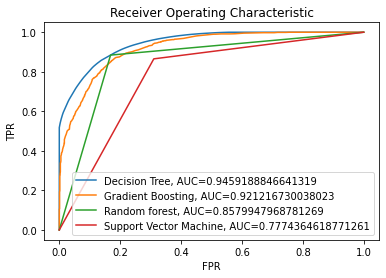

In [36]:
from sklearn import metrics

y = df_pred.internet_usage
pred = df_pred.pred_probab_dt
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(roc_auc))

y = df_pred.internet_usage
pred = df_pred.pred_proba_gb
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(roc_auc))

y = df_pred.internet_usage
pred = df_pred.pred_rf
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
plt.plot(fpr,tpr,label="Random forest, AUC="+str(roc_auc))

y = df_pred.internet_usage
pred = df_pred.pred_svm
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
plt.plot(fpr,tpr,label="Support Vector Machine, AUC="+str(roc_auc))

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()


## Which One Is the Best Model? Why?

In [38]:
df_scores = pd.DataFrame()

df_scores['models'] = [model_dt, model_gb, model_rf, model_svm]
df_scores

,models
0,DecisionTreeClassifier(max_depth=2)
1,([DecisionTreeRegressor(criterion='friedman_ms...
2,"(DecisionTreeClassifier(max_features='sqrt', r..."
3,SVC()


In [39]:
df_scores['scores'] = [model_dt.score(X= explanatory , y= target),model_gb.score(X= explanatory , y= target), model_rf.score(X= explanatory , y= target), model_svm.score(X= explanatory , y= target)]
df_scores

,models,scores
0,DecisionTreeClassifier(max_depth=2),0.799185
1,([DecisionTreeRegressor(criterion='friedman_ms...,0.841955
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.859878
3,SVC(),0.783707


In [40]:
df_scores.style.background_gradient()

,models,scores
0,DecisionTreeClassifier(max_depth=2),0.799185
1,GradientBoostingClassifier(),0.841955
2,RandomForestClassifier(),0.859878
3,SVC(),0.783707


`RandomForestClassifier does a better job at predicting the model as it is evident that it has highest score.`

## Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [X] Understand how **the Decision Tree Algorithm** is just counting observations to determine the outcome.
- [X] Another way to **compare real data with predictions** from the model.
- [X] Not all model visualizations are equal.
    - A tree was visualized instead of an `scatterplot()` to interpret the model.
- [X] Distinguish **probability's role** to optimize this type of models.
- [X] Know how to determine **why a variable is important** in the model.
    - Why is it giving significant differences?
    - How does EDA helps us to see it?
- [X] Understand the process of the algorithm to determine if we need to **normalize/scale** the data.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.